# Feed Forward Neural Network 

<img src="https://miro.medium.com/max/700/1*jHLsllWe2sU8kUsia4QZRw.jpeg"/>

PIPELINE

--> Import the Data

--> Create DataLoader

--> Create the Neural Network

--> Train the model

In [ ]:
#importing the libraries
import torch 
import numpy as np
import matplotlib.pyplot as plt

# Importing the Dataset

Sklearn is a library which can be used for a lot of machine learning purposes. This library also contains datasets.

Hence, we can import the diabetes libraries from sklearn and train the model on it

In [1]:
#importing the dataset 
from sklearn.datasets import load_diabetes
data = load_diabetes()
x = data['data']
y = data['target']
#shape
print('shape of x is : ',x.shape)
print('shape of y is : ',y.shape)

shape of x is :  (442, 10)
shape of y is :  (442,)


# Dataset and DataLoader

Dataset class in pytorch basically covers the data in a tuple and enables us to access the index of each data. this is necessary to create dataloader class which can be used to shuffle, apply Mini-Batch Gradient Descent and more

In [ ]:
#dataset
from torch.utils.data import Dataset, DataLoader
class diabetesdataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
  
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  
  def __len__(self):
    return self.length

dataset = diabetesdataset(x,y)

In [ ]:
#dataloader
dataloader = DataLoader(dataset=dataset,shuffle=True,batch_size=100)

# Feed Forward Neural Network

in Pytorch, neural networks are created by using Object Oriented Programming.The layers are defined in the init function and the forward pass is defined in the forward function , which is invoked automatically when the class is called.

These Functions are possible because of the class **nn.Module** from torch which was inherited.

In [ ]:
#creating the network
from torch import nn
class net(nn.Module):
  def __init__(self,input_size,output_size):
    super(net,self).__init__()
    self.l1 = nn.Linear(input_size,5)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(5,output_size)
  def forward(self,x):
    output = self.l1(x)
    output = self.relu(output)
    output = self.l2(output)
    return output

--> Initializing the model with the input and output shapes

--> Defining the Loss function

--> Choosing the optimizer

--> Choosing the Number of Epochs

In [ ]:
model = net(x.shape[1],1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
epochs = 1500

# Training 

The Gradients that are found from the loss function are used to change the values of the weights and the process is repeated several times.

This is done to minimize the loss function and increase the accuracy

Also , the Dataset is not split into training and test set because the amount of data is already low

In [ ]:
costval = []
for j in range(epochs):
  for i,(x_train,y_train) in enumerate(dataloader):
    #prediction
    y_pred = model(x_train)
    
    #calculating loss
    cost = criterion(y_pred,y_train.reshape(-1,1))
    
    #backprop
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
  if j%50 == 0:
    print(cost)
    costval.append(cost)

tensor(26336.3301, grad_fn=<MseLossBackward>)
tensor(3607.3894, grad_fn=<MseLossBackward>)
tensor(2773.9294, grad_fn=<MseLossBackward>)
tensor(2302.8511, grad_fn=<MseLossBackward>)
tensor(2928.7632, grad_fn=<MseLossBackward>)
tensor(2525.0527, grad_fn=<MseLossBackward>)
tensor(3494.0715, grad_fn=<MseLossBackward>)
tensor(3227.6035, grad_fn=<MseLossBackward>)
tensor(2275.8088, grad_fn=<MseLossBackward>)
tensor(3081.6348, grad_fn=<MseLossBackward>)


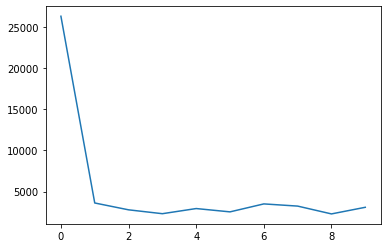

In [ ]:
#loss over time
plt.plot(np.array(costval))

# Conclusion

The trained model is used to predict the values of the same inputs (*usually, this is the test set values*) and the predicted values are plotted against the actual values

with this plot, we can see that the predicted and actual are almost similiar even though there are some errors. 

Hence, we can say the model worked well

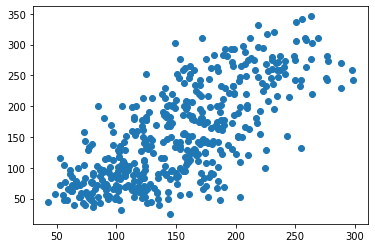

In [ ]:
#plotting prediction vs actual
plt.scatter(model(torch.tensor(x,dtype=torch.float32)).detach().numpy(),np.array(y))